In [260]:
from sympy import simplify, lambdify, latex, Symbol, binomial, factorial
#from sympy.abc import k, N, M, m
from sympy.concrete.summations import summation
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

p = Symbol('p', positive=True)
k = Symbol('k', integer=True, positive=True)
N = Symbol('N', integer=True, positive=True)
m = Symbol('m', integer=True, nonnegative=True)

In [261]:
pmf = m * binomial(N - m, k - m) / (binomial(N - 1, k - 1) * (N - k + 1))

pmf

m*binomial(N - m, k - m)/((N - k + 1)*binomial(N - 1, k - 1))

In [262]:
simplify(pmf)

m*factorial(N - m)*factorial(k - 1)/((N - k + 1)*factorial(N - 1)*factorial(k - m))

In [263]:
# Distribution parameters
_n = 25
_ks = np.arange(_n + 1)
_ns = np.array([5, 10, 15, 25])
_pis = np.array([0.2, 0.4, 0.6, 0.8])

In [264]:
# Convert PMF to Python function
pmf_l = lambdify((k, N, m), pmf)
pmf_lv = np.vectorize(pmf_l, excluded=['m', 'N'])

pmf_l(9, 20, 5)

0.007524939800481596

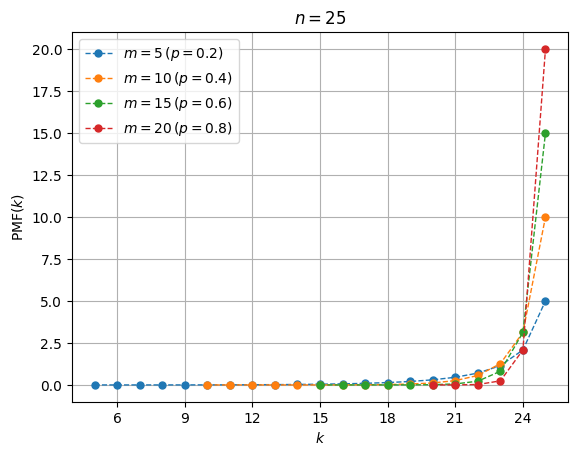

In [265]:
# Plot the PMF
fig, ax = plt.subplots()
for _pi in _pis:
    _m = int(_pi * _n)
    _ks = np.arange(_m, _n + 1)
    ax.plot(_ks, pmf_lv(_ks, _n, _m), label=f"$m={_m}\,(p={_pi})$", marker='o', linewidth=1, markersize=5, linestyle='dashed')
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("$k$")
ax.set_ylabel("PMF($k$)")
ax.set_title(f"$n={_n}$")
ax.grid()

In [266]:
pmf_bin = summation(pmf * binomial(N, m) * p ** m * (1 - p) ** (N - m), (m, 0, N))

pmf_bin

Piecewise(((-1)**(N - 1)*p*(p - 1)**(N - 1)*(-p/(p - 1) + 1)**(k - 1)*factorial(N)/(factorial(N - k)*factorial(k - 1)), ((k <= 1) & (p*Abs(1/(p - 1)) <= 1)) | ((k > 1) & (p*Abs(1/(p - 1)) <= 1))), (Sum(m*p**m*(1 - p)**(N - m)*binomial(N, m)*binomial(N - m, k - m), (m, 0, N)), True))/(N*binomial(N - 1, k - 1) - k*binomial(N - 1, k - 1) + binomial(N - 1, k - 1))

In [267]:
simplify(pmf_bin)

Piecewise(((-1)**(N + k + 1)*N*p*(p - 1)**(N - k)/(-N + k - 1), p/Abs(p - 1) <= 1), ((-1)**(N + 1)*N*factorial(k - 1)*Sum(m*p**m*(p - 1)**(N - m)/((-1)**m*factorial(m)*factorial(k - m)), (m, 0, N))/(-N + k - 1), True))

In [269]:
# Convert PMF to Python function
pmf_bin_l = lambdify((k, N, p), simplify(pmf_bin))
pmf_bin_lv = np.vectorize(pmf_bin_l, excluded=['p', 'N'])

pmf_bin_l(9, 20, 0.25)

ValueError: factorial() not defined for negative values